In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use("seaborn")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [3]:
bi_df = pd.read_csv('../Model Data/multi_trend_model_data.csv')
bi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 77 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              763 non-null    int64  
 1   Multi_Class                             763 non-null    object 
 2   Search Date                             763 non-null    object 
 3   alcoholism                              743 non-null    float64
 4   anxiety                                 743 non-null    float64
 5   athleisure                              743 non-null    float64
 6   cutting hair                            743 non-null    float64
 7   depression                              743 non-null    float64
 8   dry cough                               743 non-null    float64
 9   eczema                                  743 non-null    float64
 10  fever                                   743 non-null    float6

In [4]:
bi_df = bi_df.drop(columns={'Unnamed: 0', 'Search Date'})
bi_df = bi_df.dropna()
bi_df.head()

,Multi_Class,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,flu symptoms,...,instacart jobs,gig economy,stimmy,trump,biden,china,Total Doses Administered,Daily Increase,Current Hospitalized COVID-19 Patients,Number of Flights
0,1699-5000,39.0,73.0,27.0,29.0,50.0,11.0,82.0,27.0,7.0,...,12.0,5.0,1.0,2.0,2.0,26.0,548792878.0,144101.0,82055.86,162754.0
1,1699-5000,33.0,76.0,28.0,29.0,48.0,12.0,68.0,27.0,7.0,...,8.0,2.0,0.0,2.0,3.0,27.0,548648777.0,327557.0,85521.43,182400.0
2,550-1698,46.0,86.0,47.0,27.0,60.0,11.0,70.0,26.0,7.0,...,18.0,4.0,0.0,2.0,4.0,26.0,548321220.0,582026.0,89003.00,199407.0
3,0-549,40.0,86.0,38.0,27.0,68.0,13.0,72.0,26.0,7.0,...,8.0,2.0,0.0,2.0,5.0,28.0,547739194.0,473174.0,92676.86,197247.0
4,0-549,44.0,88.0,41.0,23.0,68.0,13.0,62.0,26.0,8.0,...,17.0,3.0,0.0,2.0,7.0,27.0,547266020.0,478132.0,97626.00,194573.0


In [5]:
X = bi_df.drop(columns=['Multi_Class'])
y = bi_df['Multi_Class']
target_names = ["0-549", "550-1698", "1699-5000"]

In [6]:
y_label = LabelEncoder().fit_transform(y)
y_label

array([1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, random_state=42)

In [8]:
rfc = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Testing Score: {rfc.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.6685082872928176


In [9]:
feature_importances = rfc.feature_importances_

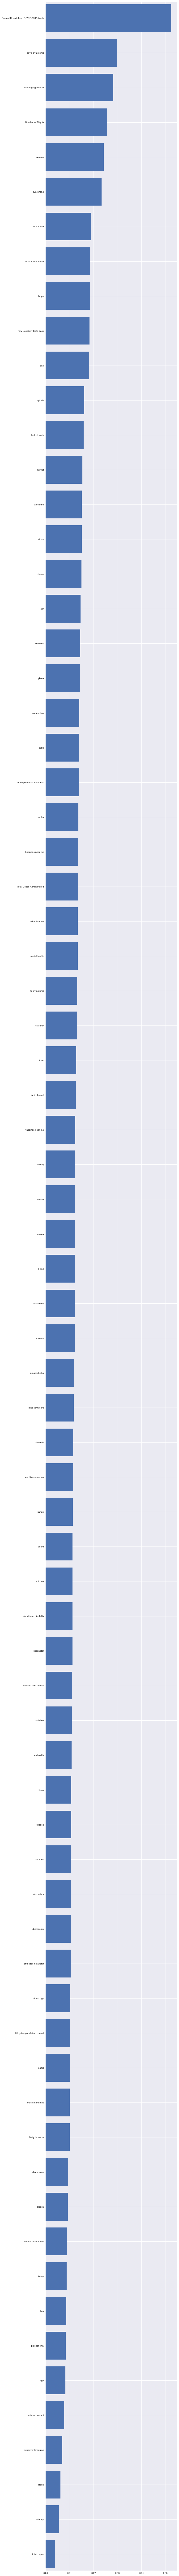

In [10]:
features = sorted(zip(X.columns, rfc.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

<AxesSubplot:>

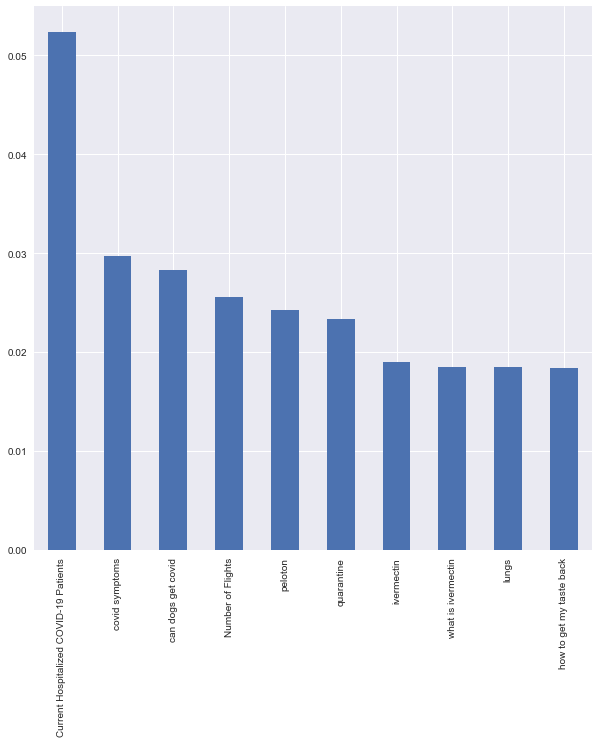

In [11]:
feat_plot=pd.Series(rfc.feature_importances_, index=X_train.columns).nlargest(10).sort_values(ascending=False)[:200].plot(kind='bar', figsize=(10,10))
feat_plot